---
<table border="0">
 <tr>
    <td><font size="2">Authors: <b>Lily Veronica, Harmeet Singh & Siraz Uz Zaman</b></font></td> 
    <td><font size="2">Date: <b>24 October 2023</b></font></td>
    <td><font size="2">Project: <b>Heart Data Clustering</b></font></td>
 </tr>
</table>

---


  <body>
    <div style="positon: relative; width: 100%">
      <img width = "100%" src="https://www.grangermedical.com/wp-content/uploads/2019/02/Cardiology-1.jpeg" alt="Heart Wallpaper">
      <div style=" display: block;   bottom: 40px; ; background-color: rgba(0, 0, 0, 0.05); padding: 10px; font-size: 28px; z-index: 99"><center><b style="color: #175676;"><u style="color: #D62839;">Heart Failures Deciphered:</u> Mapping Insights through Clusters</b></center>
      </div>
    </div>
  </body>


<h3><b><u>Introduction</u></b></h3>

In recent times, loss of life due to cardiovascular diseases has become more and more common. The Heart Failure Society of America ('HFSA') reports that their are nearly one million new heart failure cases reported annually across the United States of America. Adding to this is the fact that an eighth of the death certificates issued in the USA note heart failure as the cause of death. Although, heart failures are more common in people as they age, there are other factors such as diabetes, anaemia, hypertension and other medical conditions that contribute to the risk of heart failures.

With a collaborative agenda to increase awareness and education on heart failures and key risk factors, we, at iHeart LLC are partnering with the HFSA ('Heart Failure Society of America') to better understand the relationship between heart failures and the above mentioned factors using machine learning techniques such as clustering.

<h3><b><u>Objective of Research</u></b></h3>

The objectives of our research are mainly to:

<b>1. Understand the relationship betweek Key Risk Factors and Heart Failures:</b>
This is achieved by exploring the relationship between age, medical conditions, smoking status, patient characteristics and laboratory test results against death events using data visualization.

<b>2. Implement Machine Learning Techniques to Cluster Heart Failure Data:</b>
Existing Literature has identified ejection fraction and Serum creatinine levels as important indicators of heart failures. Our research aims to use these as base variables for clustering the heart failure data and building on to that using other risk factors such as age, smoking status, diabetes status and hypertension status. 

<b>3. Provide Recommendations in form of Key Messages to the General Public:</b>
The core objective of this research is to provide the general public (through HFSA) with validated information on key risk factors that affect heart failures. This involves explaining the impact of certain lifestyle choices on the heart health score as well as prescribing health tips to maintain a healthy lifestyle.


<h3><b><u>Data Exploration</u></b></h3>

For the purpose of this report, reliance is made on this <a href="https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records">UC Irvine Dataset</a>. The dataset contains records of 299 patients affected by heart failure.

<h4><u>a. Preparing the Analytic Environment </u></h4>


In [1]:
# Importing the Necessary Modules
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
pio.renderers.default='notebook'
np.set_printoptions(suppress=True)
pd.options.mode.chained_assignment = None

import warnings

# Suppress the specific FutureWarning and UserWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Loading the heart failure data data
heart_data = pd.read_csv('Data/heart_failure_clinical_records_dataset.csv')

<h4><u>b. Understanding the Data</u></h4>

In [2]:
# Dimensions of the data
print(f"The heart failure data has {heart_data.shape[1]} columns.")
print(f"The heart failure data has {heart_data.shape[0]} rows.")

The heart failure data has 13 columns.
The heart failure data has 299 rows.


<u><b>Obeservation:</b></u>
The above confirms that there are 13 data feature columns with information for 299 patients.

In [3]:
# Columns of the data
print(f"The heart failure data has the following columns: ")
heart_data.info()

The heart failure data has the following columns: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3),

<u><b>Obeservation:</b></u>
From the above, the following insights of the data can be made:

- <b>Risk Factors: </b>The data consists of key information of the patients such as age, smoking status, whether the patient is diabetic or not, the patient's ejection fraction, serum creatinine and serum sodium level as well as characteristics such as their gender. These are key components and attributes that can affect the survival or not of patients against heart diseases.
- <b>Data Completeness: </b> There are no missing values in the dataset as confirmed by the 'Non-Null Count' column. This therefore means that for this research, the need for cleaning the data for incomplete records or missing values is eliminated.
- <b>Data Types: </b>It is noted that their are 3 different numerical data features (the age, serum_creatinine and platelets level).

We can further enhance our understanding of the data by viewing the data:

In [4]:
# Previewing the data
print(f"A preview of the first 5 records of the heart failure data is as follows:")
heart_data.head(5)

A preview of the first 5 records of the heart failure data is as follows:


age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

<u><b>Obeservation:</b></u>
The preview of the data further highlights that the gender, diabetes status, smoking status and high blood pressure features are encoded using 0s and 1s. Upon further research of the data, the following understanding of the 0s and 1s is attained:
<li>Anaemia: 0 for no Anaemia and 1 for Anaemia</li>
<li>High blood pressure: 0 for no high blood pressure and 1 for high blood pressure</li>
<li>Diabetes: 0 for not diabetic and 1 for diabetic</li>
<li>Sex: 0 for female and 1 for male</li>
<li>Smoking: 0 for non-smoker and 1 for smoker</li>
<li>Death Event: 0 represeting the patient survived the follow-up period and 1 representing the patient died during the follow-up period</li>

Now that we have viewed the data, some key summary statistics can be pulled:

In [5]:
# Extract Summary Statistics of the Heart Failure Data
print(f"Summary Statistics of the Heart Failure Data:")
heart_data.describe()

Summary Statistics of the Heart Failure Data:


age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

<u><b>Obeservation:</b></u>
From the above summary statistics, we can infer the following:
- There are more male than female patients in the heart failures data set as witnessed by the mean value of 0.65 which is greater than 0.5, implying that their are more males
- The dataset has almost 70% cases of deaths due to heart failures. This suggests that their is enough cases in the data to explore variation in the patient's profiles and medical records that could highlight the reasons for heart failure.

<h4><u>c. Check for Missing Values</u></h4>

In [6]:
# Extract the number of missing values per column
print(f"The number of missing values are:")
heart_data.isna().sum()

The number of missing values are:


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

It is confirmed that there are no missing values in the heart failures data.

<h3><b><u>Data Pre-Processing (Cleaning & Adaptation)</u></b></h3>

<h4><u>a. Overview of the Relationship between Data Features</u></h4>

In this section, we will explore the influence of the data features to the likelihood of having a heart failure.

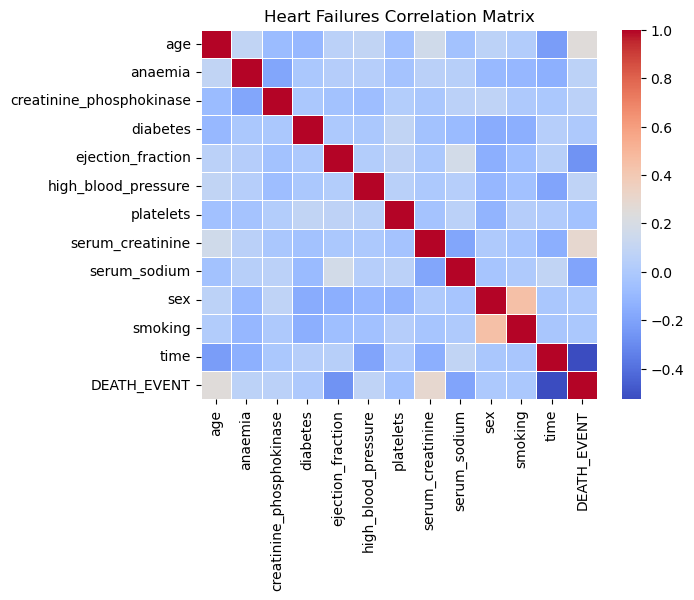

In [7]:
# Create a correlation matrix for the heart failures data
corr_matrix = heart_data.corr()

# Plotting the correlation matrix for the data features
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heart Failures Correlation Matrix')
plt.show()

<u><b>Obeservation:</b></u>
From the correlation matrix plot, it can be observed that as expected and evident from existing literature that ejection fraction and serum creatinine are the most highly correlated to death events due to heart failure. It is considered at this stage that the data features are all relevant for our analysis and thus would not be dropped at this stage.

<h4><u>b. Adaptation</u></h4>

For further analysis purposes, we will be creating the following additional data columns:
1. <b>Cardiac Risk Score</b> - which is a score that combines the overall impact of being anemic, having high blood pressure and having non-normal ejection fraction levels.
2. <b>Age Category</b> - which categorizes the age of the patients into life cycle buckets such as Children(0), Young Adult (1), Middle Aged Adult (2) and Senior Citizen (3).

In [8]:
# Create function to categorize age 
def categorize_age(data):
    if data["age"] < 19:
        return 'Children'
    elif data["age"] < 30:
        return 'Young Adult'
    elif data["age"] < 60:
        return 'Middle Aged Adult'
    else:
        return 'Senior Citizen'

# Create function to calculate cardiac risk score  
def calculate_cardiac_score(row):
    anaemia_bp_score = row['anaemia'] + row['high_blood_pressure'] + row['diabetes'] + row['smoking']
    ef_score = 0 if 55 <= row['ejection_fraction'] <= 70 else 1
    return anaemia_bp_score + ef_score

In [9]:
# Passing the heart data through the created functions
final_heart_data=heart_data
final_heart_data['cardiac_risk_score'] = heart_data.apply(calculate_cardiac_score, axis=1)
final_heart_data["age_category"] = heart_data.apply(categorize_age, axis=1)

# Confirm that the new fields have been created
heart_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  cardiac_risk_score        299 non-null    float64
 14  age_catego

In summary, given that the data set does not have any incomplete records nor does it have any missing values, the need to clean the data was eliminated. For the adaptation, we have created two new columns in line with our research objectives which is to evaluate the impact of key risk factors on heart failures.

<h3><b><u>Data Visualization</u></b></h3>

In this section, we will be exploring the relationship of the various data features by means of visualisation techniques in python. Some of the key relationships that we explore are as follows:

1. Relationship of Age and Likelihood of Dying due to Heart Failure
2. Distribution of deaths due to heart failure amongst males and females
3. Relationship between follow up period and Heart Failure
4. Relationship between Serum Creatinine and Ejection Fraction of Patients

<h4><b>a. Relationship of Age and Likelihood of Dying Due to Heart Failure</b></h4>

In [10]:
# Create proportion of Heart Failures per Age Group
fail_proportions = heart_data.groupby('age_category')['DEATH_EVENT'].mean()

# Plot a bar graph of Age Category against the Proportion of Death events
fig = px.bar(fail_proportions, title="Proportion of Heart Failures by Age Category", color = ['lightgreen', 'orange'],width=800, height=500)
fig.update_xaxes(title_text="Age Category")
fig.update_yaxes(title_text="Proportion of Heart Failures")
fig.update_traces(showlegend=False)
fig.show()


As expected, the plot above suggests that the likelihood of patients to die due to heart failures is higher for the more elderly and thus it can be acknowledged that as age increases, so does the risk of heart failure.

<h4><b>b. Distribution of Deaths due to Heart Failure amongst Males and Females</b></h4>

In [11]:
# Filter the dataset for only heart failures
death_df = heart_data[heart_data['DEATH_EVENT']==1]

# Plot a pie chart of heart failures distribution by Gender
fig = px.pie(death_df, names="sex", title="Proportion of Heart Failures by Gender",width=800, height=500)

new_label_names = {0: 'Female', 1: 'Male'}

# Learnings from Stack Overflow

fig.for_each_trace(lambda t: t.update(
  labels=[new_label_names.get(int(label), label) for label in t.labels.astype(int)]
))
fig.show()

<u><b>Obeservation:</b></u>
The pie chart above illustrates that for all deaths due to heart failures, 64.6% are of male patients. This may make one believe that males are more prone to heart failures but from our exploratory data analysis, we did note that the data of the 299 patients consisted of almost 65% male patients. This means that the higher heart failures for male patients in the plot above does not necessarily mean that there is influence of the patient's gender on the heart failure.

This is indeed in line with expectation, as one would expect that the risk of heart failure is not affected by the gender of the individual but rather than other attributes such as age, lifestyle choices, pre-existing diseases and other medical conditions.

<h4><b>c. Relationship between follow up period and Heart Failure</b></h4>

In [12]:
# Plot boxplots of Death Event against time to follow up
fig = px.box(final_heart_data, x="DEATH_EVENT", y="time", title="Heart Failure Vs Follow-up Period", width=800, height=500)
fig.update_xaxes(title_text="Heart Failure (0=No, 1=Yes)")
fig.update_yaxes(title_text="Follow-up Period (Days)")
fig.show()


<u><b>Obeservation:</b></u>
From the above box plots of heart failure against follow up period, we notice that individuals with lower follow-up periods are more likely to die due to heart failure compared to the patients who have a longer follow-up period. This is in line with the fact that patients with more critical heart disease (or symptoms) are likely to be monitored closely by the cardiologist than patients that portray lower risk of having a heart disease. This suggests that, the likelihood of a patient's heart failure can be deduced based on the number of days that the cardiologist or doctor prescribes for the next follow-up.

<h4><b>d. Relationship between Serum Creatinine,Ejection Fraction and Time of Follow-Up of Patients</b></h4>

In [13]:
# Plot a scatter graph of ejection fraction vs serum creatinine
fig = px.scatter_3d(final_heart_data,z="time",y="ejection_fraction", x="serum_creatinine", color="DEATH_EVENT", title="Ejection Fraction Value vs. Serum Creatinine",width=800, height=500)
fig.update_xaxes(title_text="Serum Creatinine (mg/dL)")
fig.update_yaxes(title_text="Ejection Fraction Value")
fig.show()

<u><b>Obeservation:</b></u>
From the scatter plot above it can be witnessed that for normal range of ejection fraction values (55% to 70%), the number of heart failures (yellow points in plot) are lower when compared to the points below the 55% ejection fraction value levels. This suggests that maintaining normal ejection fraction percentage and low serum creatinine levels is key to preventing heart failures. And alternatively, below normal ejection fraction percentages and high serum creatinine levels suggest that there is a higher likelihood of heart failure for patients.

<h3><b><u>Cluster Analysis</u></b></h3>

<h4><b>Hierarchical Clustering: Step-by-Step Process (Number of Clusters = 1)</b></h4>

In this section, we will explore hierarchial clustering using the agglomerative approach (bottom-up approach). The hierarchial clustering is carried out using numpy and pandas exclusively. In our approach, we have carried out the clustering process using the following features in the heart failures dataset:

- Creatinine Phosphokinase Levels
- Platelets Count
- Serum Creatinine Levels
- Serum Sodium Levels
- Gender of Patient
- Age Category
- Cardiac Risk Score
- Follow up time
- Death Event (1 for patient died due to heart failure during the follow-up period and 0 for patient survived the follow-up time)

The other variables such as the age of the patient are captured in the broader age category variable and the impact of other variables such as anaemia, diabetes, smoking, ejection fraction and high blood pressure are captured in the Cardiac Risk Score Variable.

In [14]:
# Creating a function to calculate the Euclidean Distance between two cluster points
def euclidean_dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

In [15]:
# Creating a function to carry out the agglomerative clustering
def agglo_cluster(datainput):
    clusters = [[point] for point in datainput] # creating a list for each of the cluster points into a list of lists

    while len(clusters) > 1: # defining the while loop to ensure that it keeps iterating until the number of clusters is 1
        minimum_dist = float('inf') # defining the minimum distance to be positive infinity, for the initial phase only as minimum distances will keep reducing
        merge_indices = None # this ensures that we have 0 clusters combined at the initial position as there is no euclidean distance calculated yet

        for i in range(len(clusters)): # for every cluster...
            for j in range(i + 1, len(clusters)): 
                distance = euclidean_dist(np.mean(clusters[i], axis=0), np.mean(clusters[j], axis=0)) # ... determine the euclidean distance between two pairs of the clusters using the centroid approach
                if distance < minimum_dist: # check if the distance between the pair of clusters is smaller than previous iteration
                    mininimum_dist = distance #if so, override the updated minimum distance for the pair
                    merge_indices = (i, j) # the clusters are merged with minimum distance to each other

        if merge_indices: 
            i, j = merge_indices
            clusters[i].extend(clusters[j]) # combining the cluster points from the second cluster into the first cluster.
            del clusters[j] # deleting the second group of clusters, since it has been merged with the 1st cluster

    return clusters[0]

Now that we have functions for calculating the euclidean distance and carrying out the agglomerative clustering defined, we proceed to pass our dataset into these functions to create our clusters.

In [16]:
# Extracting the clustering features as a numpy array
clustering_features = ['creatinine_phosphokinase','platelets','serum_creatinine', 'serum_sodium', 'sex', 'time','DEATH_EVENT']
cluster_data = np.array(heart_data[clustering_features])

In [17]:
# Passing the cluster_data through the agglomerative clustering function
manual_hierarchical_clusters = agglo_cluster(cluster_data)


# Confirming that the cluster (one only) has same length as initial data
print(f"The length of the cluster after the Step-by-step hierarchial cluster is as follows: {len(manual_hierarchical_clusters)}")

The length of the cluster after the Step-by-step hierarchial cluster is as follows: 299


<u><b>Obeservation:</b></u>
Now that we have successfully created the hierarchical cluster for iteration 1, we can proceed to visualize the output of the clustering process via a dendrogram below.

<h4><b>Dendrogram of the Heart Failures Data</b></h4>

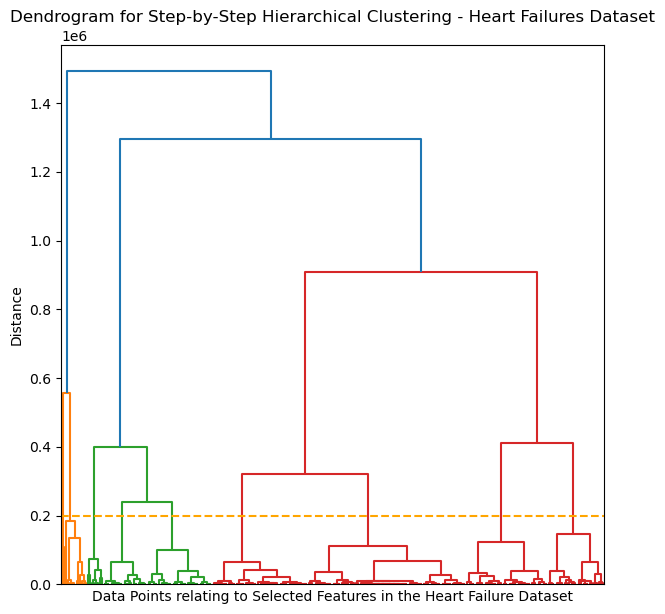

In [18]:
# Calculate linkage matrix
linkage_matrix = linkage(manual_hierarchical_clusters, method='ward')

# Creating a dendrogram with labels
plt.figure(figsize=(7,7))
dendrogram(linkage_matrix, labels=np.arange(len(manual_hierarchical_clusters)))
plt.title("Dendrogram for Step-by-Step Hierarchical Clustering - Heart Failures Dataset")
plt.xlabel("Data Points relating to Selected Features in the Heart Failure Dataset")
plt.ylabel("Distance")
plt.xticks([])
plt.axhline(y=200000, color='orange', linestyle='--', label=f'Distance = 200,000')
plt.show()

<u><b>Obeservation:</b></u>
From the dendogram above, we can see that the step-by-step hieararchical clustering function was able to achieve the desired number of clusters of 1. 

We are able to see the overall clustering structure which shows how the various data points (patient attributes) in the heart failure data are merged together. 

From the Dendogram based on the heart failures data, there are about 9 distinct clusters when the distance is set to 200,000. This is highlighted as the orange line in the graph above. This means that the 299 distinct patients could be clustered into 9 different groups at the selected cut off.

Lastly, the similarity of the clusters is driven by the euclidean distance which is basically the centroid linkage method. 

We can now based on the manual process, adopt a new hierarchical clustering with 9 clusters as the desired number of clusters.

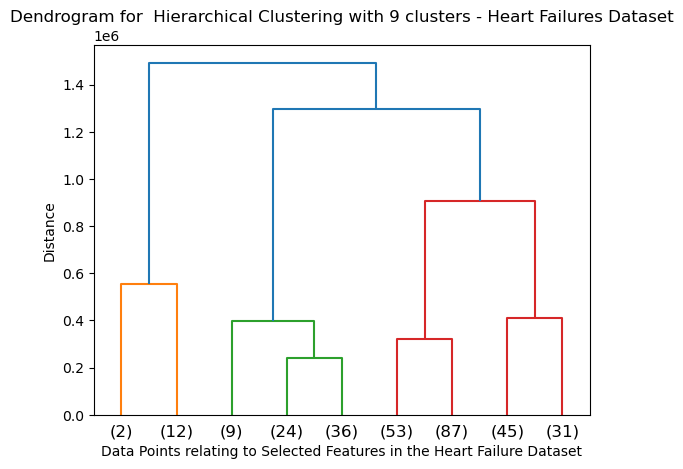

In [19]:
# Creating clusters using sklearn
desired_clusters = 9
heart_data_clustering = AgglomerativeClustering(n_clusters=desired_clusters)
heart_data_clustering.fit(cluster_data)

# Calculate linkage matrix
linkage_matrix = linkage(cluster_data, method='ward')

# Create a dendrogram
dendrogram(linkage_matrix, truncate_mode='lastp', p=desired_clusters, labels=heart_data_clustering.labels_)
plt.title("Dendrogram for  Hierarchical Clustering with 9 clusters - Heart Failures Dataset")
plt.xlabel("Data Points relating to Selected Features in the Heart Failure Dataset")
plt.ylabel("Distance")
plt.show()

<u><b>Obeservation:</b></u>
The above dendogram after setting the desired clusters to 9 provides a clearer representation of the hierarchical clustering in the heart failures data. The values in the x-axis suggest the number of patients per cluster which total upto 299 patients.

<h3><b><u>Unsupervised Clustering</u></b></h3>

For our unsupervised learning, we focused on three features which according to our previous exploration and analysis we felt had the most contribution to the explainabilty of death happening to the patients. 
The features are:
- Ejection Fraction
- Serum Creatinine Levels
- Time (time between Follow-Ups)

### <b><u>Step i: Subset of the Data</u></b>

In [20]:
df = final_heart_data[["ejection_fraction", "serum_creatinine", "time"]]

### <b><u>Step ii: Scaling the Data</u></b>

Since the data has varied numerical range, we scale it to have a better clustering analysis.

In [21]:
#Scaling the data
num_cols = df.columns[df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

### <b><u>Step iii: Step By Step KMeans Clustering using custom functions</u></b>

In this section we used three functions to carry-out the KMeans Clustering to Cluster our data, to replicate the clustering pattern that we observed during our data exploration, where we saw there was a hint of clear division among the points having similar behavior among pations who had suffered cardiac arrest and died and who didn't. We aim to build a relationship based on that premise and see if we could mark the patients who have high chances of being affected by severe health condition

In [22]:
def plot(centroids, iteration_number, data):
    """
    The function receives the centroids, iteration number and data 
    to plot the clustered datapoints
    """
    fig = px.scatter_3d(data, x='serum_creatinine', 
                     y='ejection_fraction',
                     z="time",
                     color="Cluster_Assignment",
                     width=800, 
                    height=500,
                    symbol="Cluster_Assignment")
    fig.add_trace(go.Scatter3d(x=centroids[:,0], y=centroids[:,1], z=centroids[:,2],  text="Centroid", mode='markers', marker=dict(size=10, color='red')))
    fig.update_layout(title=f'Iteration {iteration_number+1}')
    fig.update_layout(showlegend=False)
    fig.update_layout(
    margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor="LightSteelBlue")
    fig.show()



def assign_cluster(centroids, data):
    """ 
    The function receives the centroids and calculate the distances
    of each point from the centroid and assign the datapoints
    based on the least distance
    """
    data["Dist_C1"] = np.sqrt((data[data.columns[0]] - centroids[0][0])**2+
                        (data[data.columns[1]]- centroids[0][1])**2+
                        (data[data.columns[2]]- centroids[0][2])**2)
    data["Dist_C2"] = np.sqrt((data[data.columns[0]] - centroids[1][0])**2+
                        (data[data.columns[1]] - centroids[1][1])**2+
                        (data[data.columns[2]]- centroids[0][2])**2)
    data['Cluster_Assignment'] = np.where(data['Dist_C1'] < data['Dist_C2'], 1, 2)
    return data


def kmeans(dataframe, features:list, n_iterations:int, n_clusters:int=2):
    """ 
    This is the main function which receives the datafreame, features list(the features that is needed for analysis),
    number of iterations and number of clusters. For our analysis we chose to keep number of clusters by default 2
    """
    np.random.seed(42)
    dataset = np.random.rand(dataframe.shape[0], len(features))
    for i in range(n_iterations):
        if i==0:
            random_indices = np.random.choice(len(dataset), n_clusters, replace=False)
            centroids = dataset[random_indices]
        else:
            centroids[0] = dataframe[dataframe.Cluster_Assignment == 1][features].mean()
            centroids[1] = dataframe[dataframe.Cluster_Assignment == 2][features].mean()
        dataframe = assign_cluster(centroids, dataframe)
        plot(centroids,i,dataframe)

In [23]:
kmeans(df,["ejection_fraction", "serum_creatinine","time"],5)

<u><b>Obeservation:</b></u>
From the above figure we can clearly see there is a clear distinction in the distribution of the points into two clusters, which we can relate to our previous findings, where we related the three features and we saw a clear division among the patients who died and who didn't. Similar results can also be seen in the clustering analysis supporting our hypothesis and approach.

In [24]:
df1 = final_heart_data[["ejection_fraction", "serum_creatinine", "time"]]
model = KMeans(n_clusters=2,n_init=1)
model.fit(df1)
df1["Cluster_Assignment"] = model.labels_

fig = px.scatter_3d(df1, 
                x='serum_creatinine', 
                y='ejection_fraction',
                z="time", 
                color="Cluster_Assignment",  
                symbol="Cluster_Assignment",  
                width=800, 
                height=500)

fig.update_layout(showlegend=False)
fig.update_layout(
    margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor="LightSteelBlue")

fig.show()

<u><b>Obeservation:</b></u>
The Kmeans result using the sklearn kmeans also gives us a similar output compared to the Step By Step Approach.

<h3><b><u>Supervised Clustering:</u></b></h3>

In our Supervised Approach, we used the `Death Event` column as our target variable and tried to predict chances of death based on the other features.

In [25]:
def predictKNN(k,patient_data,data_frame,target_column):
    """
    The function receives number of neighbours, test vector, data frame and target column
    """
    # We need to reshape the test vector data so that it acts as  a single instance
    patient_data_vector = np.array(list(patient_data.values()))
    patient_data_vector = patient_data_vector.reshape(1,-1)

    #Split the data into test and train
    x = data_frame.drop(target_column, axis=1)
    y = data_frame[target_column]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    #Scale the data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    patient_data_vector = scaler.transform(patient_data_vector)
    #Determine the accuracy
    

    #Instantiate the Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    return (knn.predict(patient_data_vector),accuracy_score(y_test,knn.predict(x_test)))

In [26]:
# Preparing the dataframe for learning
heart_data = final_heart_data.copy()
heart_data = heart_data.drop(["anaemia","high_blood_pressure","smoking","age_category"],axis=1)

In [27]:
# Predicting the DEATH_EVENT based on patient profile 1
patient1_data = {"age":80,
                "creatinine_phosphokinase":582,
                "diabetes":1,
                "ejection_fraction":20,
                "platelets":265000,
                "serum_creatinine":1.1,
                "serum_sodium":130,
                "sex":1,
                "time":3,
                "caridac_risk_score":4}

y_pred = predictKNN(5,patient1_data,heart_data,"DEATH_EVENT")
print(f"Predicted Label: {y_pred[0]}, where 1 relates to Death due to Heart Failure and 0 refers to survival")
print(f"The accuracy score of this prediction is {round(y_pred[1],2)*100}%")


Predicted Label: [1], where 1 relates to Death due to Heart Failure and 0 refers to survival
The accuracy score of this prediction is 68.0%


In [28]:
# Predicting the DEATH_EVENT based on patient profile 2
patient2_data = {
    "age": 60,
    "creatinine_phosphokinase": 110,
    "diabetes": 0,
    "ejection_fraction": 35,
    "platelets": 350000,
    "serum_creatinine": 9.2,
    "serum_sodium": 140,
    "sex": 1,
    "time": 10,
    "caridac_risk_score": 4,
}
y_pred = predictKNN(5,patient2_data,heart_data,"DEATH_EVENT")
print(f"Predicted Label: {y_pred[0]}, where 1 relates to Death due to Heart Failure and 0 refers to survival")
print(f"The accuracy score of this prediction is {round(y_pred[1],2)*100}%")

Predicted Label: [1], where 1 relates to Death due to Heart Failure and 0 refers to survival
The accuracy score of this prediction is 68.0%


In [29]:
# Predicting the DEATH_EVENT based on patient profile 3
patient3_data = {
    "age": 45,
    "creatinine_phosphokinase": 250,
    "diabetes": 1,
    "ejection_fraction": 50,
    "platelets": 180000,
    "serum_creatinine": 9.0,
    "serum_sodium": 138,
    "sex": 0,
    "time": 24,
    "caridac_risk_score": 1,
}

prediction = predictKNN(5,patient3_data,heart_data,"DEATH_EVENT")
print(f"Predicted Label: {prediction[0]}, where 1 relates to Death due to Heart Failure and 0 refers to survival")
print(f"The accuracy score of this prediction is {round(y_pred[1],2)*100}%")

Predicted Label: [1], where 1 relates to Death due to Heart Failure and 0 refers to survival
The accuracy score of this prediction is 68.0%


In [30]:
# Predicting the DEATH_EVENT based on patient profile 4
patient4_data = {
    "age": 68,
    "creatinine_phosphokinase": 700,
    "diabetes": 0,
    "ejection_fraction": 10,
    "platelets": 300000,
    "serum_creatinine": 2.3,
    "serum_sodium": 132,
    "sex": 1,
    "time": 8,
    "caridac_risk_score": 4,
}
prediction = predictKNN(5,patient4_data,heart_data,"DEATH_EVENT")
print(f"Predicted Label: {prediction[0]}, where 1 relates to Death due to Heart Failure and 0 refers to survival")
print(f"The accuracy score of this prediction is {round(y_pred[1],2)*100}%")

Predicted Label: [1], where 1 relates to Death due to Heart Failure and 0 refers to survival
The accuracy score of this prediction is 68.0%


In [31]:
# Predicting the DEATH_EVENT based on patient profile 5
patient5_data = {
    "age": 55,
    "creatinine_phosphokinase": 320,
    "diabetes": 1,
    "ejection_fraction": 40,
    "platelets": 220000,
    "serum_creatinine": 1.3,
    "serum_sodium": 135,
    "sex": 0,
    "time": 36,
    "caridac_risk_score": 2,
}
prediction = predictKNN(5,patient5_data,heart_data,"DEATH_EVENT")
print(f"Predicted Label: {prediction[0]}, where 1 relates to Death due to Heart Failure and 0 refers to survival")
print(f"The accuracy score of this prediction is {round(y_pred[1],2)*100}%")

Predicted Label: [0], where 1 relates to Death due to Heart Failure and 0 refers to survival
The accuracy score of this prediction is 68.0%


---

<h3><b><u>Project Report:</u></b></h3>

We are pleased to present our research findings, conducted in collaboration with the Heart Failure Society of America('HFSA') which aimed at understanding heart failures and the associated risk factors. This report highlights our objectives, methodology, key discoveries, and actionable recommendations.

<h4>Background</h4>

In the recent years, cardiovascular diseases have claimed an increasing number of lives. The Heart Failure Society of America('HFSA') reports nearly one million new heart failure cases annually in the United States, with heart failure listed as the cause of death on one-eighth of all death certificates. While aging is a contributing factor, various other conditions, including diabetes, anemia and hypertension heighten the risk of heart failure. In collaboration with HFSA, iHeart LLC is using various techniques to explore the connection between these factors. Our mission is to enhance awareness, education, and prevention, ultimately reducing the impact of heart failures. 

<h4>Research objective</h4> 

1. Understanding the relationship between key risk factors and heart failures.
2. Implementing techniques for clustering heart failure data.
3. Providing recommendations to the general public through HFSA.

<h4>Data Exploration and Preprocessing</h4>

The dataset contains information related to heart failure cases, including various features such as age, medicial conditions(anaemia, high blood pressure, diabetes), clinical measurements(ejection fraction, serum creatinine, serum sodium), patient demographics(gender, smoking status), and the time of observation. Categorical features like anaemia, high blood pressure, diabetes, sex, smoking and death event, are encoded with 0 and 1. For instance, 0 represents the absence of the condition, while 1 indicates the presence of the condition.

The heart failure dataset is confirmed to be free from any missing values or incomplete records, eliminating the need for data cleaning.
In preparation for further analysis, two new data columns have been created- 
1. Cardiac Risk Score - This score combines the impact of anemia, high blood pressure and non-normal ejection levels.
2. Age Category - Age has been categorized into children, Young adults, Middle-Aged Adults and Senior Citizens.
These Adaptaions align with the research objective of assessing the impact of key risk factors on heart failures.

<h4>Data Visualization</h4>

We have delved into the dataset's underlying insights through the application of Python-based visualization techniques. We have focused on several critical relationships, including:
- Analyzing the connection between age and the probability of heart failure-related mortality.
- Examining the distribution of heart failure-related deaths across genders. 
- Investigating the link between the duration of follow-up and heart failure occurences.
- Exploring the interplay between serum creatinine levels, ejection fraction and follow-up period for patients.

<h4>Cluster Analysis</h4>

Based on out Hierarchical Clustering, we did determine that the overall attributes of the 299 patients suggests that there are 9 clusters or groups of patients. This is shown below:

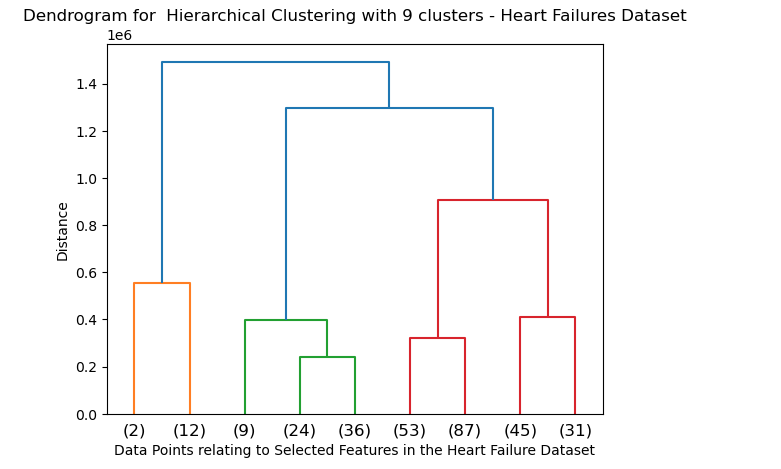

This was determined based on a distance/threshold value of 200,000 across all the data points and attributes in the heart failures data set.

<h4>Unsupervised Clustering</h4>

In this section, we carried out the Kmeans clustering. The objective of the clustering process was to replicate the classification of the death event due to heart failure. Our original plot of the ejection fraction, serum creatinine and follow-up period matches closely to our 5th iteration of the k-means clustering technique. This suggests that if the data was not labelled, that is if there was no indicator as to whether a patient dies or not, still some clustering could be conducted to determine the likelihood of having a heart failure.

In this approach, we used the centroid appraoch by setting an initial centroid and then iterating through it. The fifth iteration of the clustering resembles closely with the plot that uses the data's original classification of the death event.

Below is the original plot using the heart failure datas classification of the death event:

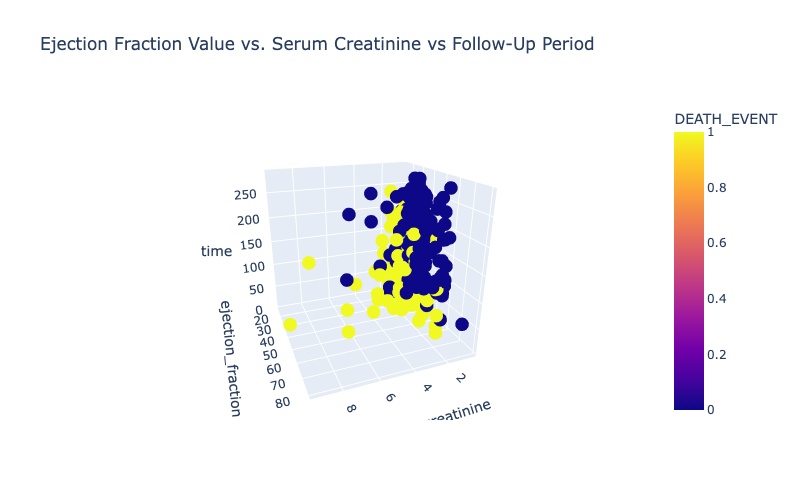

And the plot of the two clusters based on k-means is as follows:

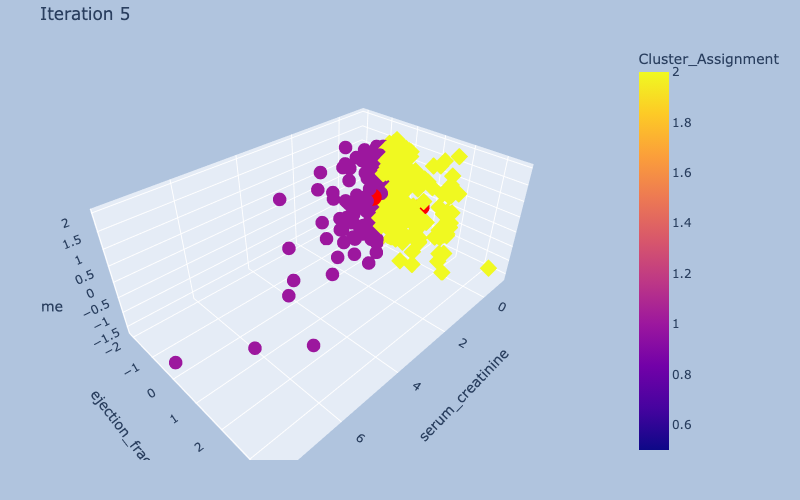

<h4>Supervised Clustering</h4>

Lastly, we created a K Nearest Neighbor function that uses the attributes of the heart failure data to learn and replicate the classification of the death event. The model was then fit with 5 random patient profile vectors which resulted to the prediction of a death event for two out of the five patients. This prediction was supported by an accuracy score of 68% of the KNN predict function. The accuracy score is fairly good and advocates for the use of this model for prediction of heart failures for heart patients using the variables ejection fraction, serum creatinine levels and the suggested follow up period.

<h4>Learnings for HFSA</h4>
From the research above, we have been able to validate the key risk factors (high blood pressure, diabetes - in our cardiac risk score) that affect heart failures as highlighted by HFSA on their website <a href="https://hfsa.org/patient-hub/heart-failure-facts-information">here</a>.

It is thus of vital importance to highlight these risk factors and potential symptoms of heart diseases to the general public for the maximisation of survival of any individuals that may be  potentially suffering from a heart disease.

---

<h3>Originality of Report</h3>

The heart failures dataset was sourced from UC Irvine dataset which was published in February 2020. The data set was used to determine the influence of ejection fraction and serum creatinine levels on heart failure in the paper published by Davide Chicco, Giuseppe Jurman: Heart failure clinical records. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z89R. Their approach did not involve conducting clustering of the heart failure data as we have done for this project and thus confirms the originality of our report.

---

--- End of Report ---